From Jerry Meyers, you’re going to have to science the shit out of this:

Congratulations, astronaut! You’ve been selected for the first manned mission to Mars. You are slated to spend five Earth-years on the surface of the red planet (1,825 Earth-days — you can ignore leap years).

Conditions on the planet will be brutal, and they will be especially rough on the equipment required to keep you alive. In fact, it is known that exactly one vital piece of equipment will break each day. Therefore, you and the rest of the international team of astronauts will be sent with three 3D printers to print replacement parts for critical equipment.

Each printer is manufactured in a different country, however, and therefore parts from one printer are not compatible with any of the other printers (that means no scavenging allowed). If something breaks on a 3D printer, you will have to use one of the other 3D printers to print a replacement part. Any part can be printed effectively instantly, though any given printer only has the power to print one piece a day.

The Riddler Aeronautics and Space Administration (RASA) has tested all three printers and found that, in addition to the daily breakage of the vital life-support equipment, one has a 10 percent chance of something breaking on any given day, the second a 7.5 percent chance and the last a 5 percent chance. If you can’t quickly print a replacement part for any piece of vital equipment, you’ll die.

What are the chances that you make it home alive?

# Definitions & Assumptions

We will specify the state of the three 3D printers at the beginning of the day using binary: $111$ indicates all 3 are functional, $010$ indicates only the 2nd is functional, etc.

We therefore begin in state $111$.

We will make the following simplifying assumption:

* All equipment breakages (vital equipment and 3D printers) occur simultaneously at the same time at the end of each Earth day (say, 11:59 PM Houston time).

This allows us to say that we will never begin the day with 2 functional printers ($110$, $101$, or $011$). This is because, at 11:59 the night before, if we have 2 functional printers and a broken piece of vital equipment, we will immediately fix the broken vital equipment and the broken printer, beginning the next day with 3 functional printers.

Futhermore, once we are in a state with only one functional printer (ex: $100$) we have only two possibilities:

* Remain in that state (the printer did not break that day, and we used it to fix the broken vital equipment)
* Die (state $000$), since the printer broke that day, and were unable to fix the broken vital equipment

Therefore, we consider five possible states of the system at the beginning of each day:

* $111$: all printers functional
* $100$: only printer A functional
* $010$: only printer B functional
* $001$: only printer C functional
* $000$: No printers functional (dead)

The probability of failures of printers A, B, and C, are, respectively:

* $a = 0.1$
* $b = 0.075$
* $c = 0.05$

We can model the probability of surviving by modeling the transition matrix $T$, where $T_{ij}$ is the probability of transitioning from state $i$ to state $j$ in a given day.

\begin{align}
T &= \begin{bmatrix}
    p(111 \rightarrow 111) & p(111 \rightarrow 100) & p(111 \rightarrow 010) & p(111 \rightarrow 001) & p(111 \rightarrow 000)\\
    p(110 \rightarrow 111) & p(110 \rightarrow 100) & p(110 \rightarrow 010) & p(110 \rightarrow 001) & p(110 \rightarrow 000)\\
    p(101 \rightarrow 111) & p(101 \rightarrow 100) & p(101 \rightarrow 010) & p(101 \rightarrow 001) & p(101 \rightarrow 000)\\
    p(011 \rightarrow 111) & p(011 \rightarrow 100) & p(011 \rightarrow 010) & p(011 \rightarrow 001) & p(011 \rightarrow 000)\\
    p(000 \rightarrow 111) & p(000 \rightarrow 100) & p(000 \rightarrow 010) & p(000 \rightarrow 001) & p(000 \rightarrow 000)
\end{bmatrix}\\
&= \begin{bmatrix}
    1 - ab - bc - ac + 2abc & (1-a)bc & a(1-b)c & ab(1-c) & abc\\
    0 & 1-a & 0 & 0 & a\\
    0 & 0 & 1-b & 0 & b\\
    0 & 0 & 0 & 1-c & c\\
    0 & 0 & 0 & 0 & 1 
\end{bmatrix}
\end{align}

The most complex term above was $p(111 \rightarrow 111)$, but as argued, we will remain having 3 printers as long as no more than 1 printer fails in a given day. Therefore, we compute the probability of two or more failing ($ab + bc + ac - 2abc$, accounting for double-counting), and take $1-$ that.

We begin with 100% probability of being in state $111$, and then track the probability of being in each other state after $N$ days as:

$$
S_N = \begin{bmatrix}
p(111) \\
p(100) \\
p(010) \\
p(001) \\
p(000)
\end{bmatrix}
= \begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
0
\end{bmatrix} T^N
$$

We survive after $N$ days as long as we are not in state $000$.

# Solution

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-poster')
%matplotlib inline

In [64]:
a = 0.1  # probability of first printer failure
b = 0.075  # probability of second printer failure
c = 0.05  # probability of third printer failure

In [87]:
T = np.array([[1. - a*b - a*c - b*c + 2*a*b*c, (1-a)*b*c, a*(1-b)*c, a*b*(1-c), a*b*c],
             [0, 1-a, 0, 0, a],
             [0, 0, 1-b, 0, b],
             [0, 0, 0, 1-c, c],
             [0, 0, 0, 0, 1]])
for i in range(5):
    assert np.isclose(T[i].sum(), 1.0)

In [88]:
def prob_survival(N):
    T_n = np.linalg.matrix_power(T, N)
    assert np.isclose(T_n[0].sum(), 1.0)
    return T_n[0, :4].sum()

In [89]:
prob_survival(100)

0.27641079121112255

Text(0.5,0,'Mission Days')

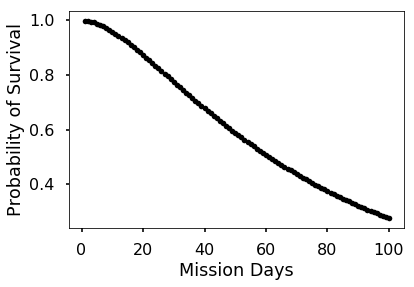

In [90]:
fig, ax = plt.subplots()
N = 100
x = np.arange(N)+1
ax.plot(x, [prob_survival(i) for i in x], 'k.')
# ax.set_yscale('log')
ax.set_ylabel('Probability of Survival')
ax.set_xlabel('Mission Days')

Text(0.5,0,'Mission Days')

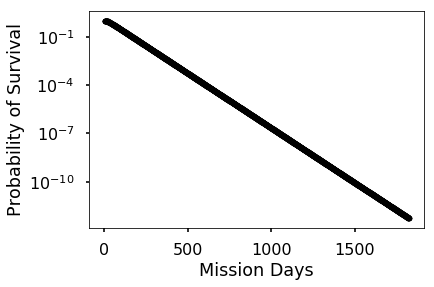

In [91]:
fig, ax = plt.subplots()
N = 1825
x = np.arange(N)+1
ax.plot(x, [prob_survival(i) for i in x], 'k.')
ax.set_yscale('log')
ax.set_ylabel('Probability of Survival')
ax.set_xlabel('Mission Days')

In [92]:
prob_survival(1825)

5.503530397142464e-13

In [95]:
1./prob_survival(1825)

1817015493398.9622

Therefore, there is only a $5.5\times10^{-13}$ (or less than 1 in a trillion) chance of surviving for 1825 days